In [1]:
import torch
import matplotlib.pyplot as plt
import pickle

import settings
from trainer_helpers import train_global_n_gram, find_hyperparams
from Vocabulary import Vocabulary
from data_generators.DataGenerator import DataGenerator

In [2]:
if settings.USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

print('using device:', device)

using device: cpu


In [3]:
with open(settings.test_vocabulary_path, 'rb') as f:
        vocabulary = pickle.load(f)

In [4]:
with open(settings.test_global_n_gram_data_generator_path, 'rb') as f:
    data_generator = pickle.load(f)

In [5]:
lr = 0.001
gamma = 0.1
step_size = 2
train_losses, val_accuracies, model = train_global_n_gram(data_generator, settings.embedding_dim, device, lr,
gamma, step_size)

KeyboardInterrupt: 

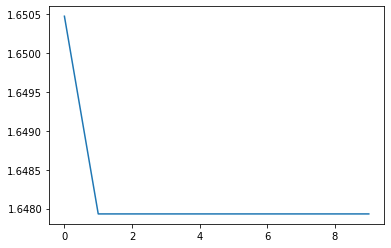

In [6]:
plt.plot(train_losses)
plt.show()

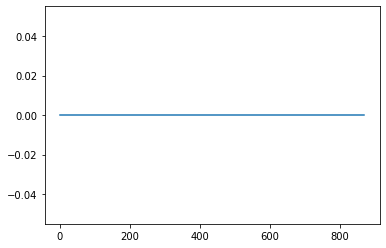

In [7]:
plt.plot(val_accuracies)
plt.show()

In [9]:
best_val, best_model, best_stats, results = find_hyperparams(5, train_global_n_gram, data_generator, settings.embedding_dim, device, step_size)

validation accuracy: 0.000000, rate: 0.000001, gamma: 0.000006
validation accuracy: 0.000000, rate: 88.849623, gamma: 0.023681
validation accuracy: 0.000000, rate: 0.001179, gamma: 0.000464
validation accuracy: 0.000000, rate: 0.000447, gamma: 0.000099
validation accuracy: 0.000000, rate: 13.419345, gamma: 0.155014
validation accuracy: 0.000000, rate: 0.000282, gamma: 0.003678
validation accuracy: 0.000000, rate: 0.000007, gamma: 0.000670
validation accuracy: 0.000000, rate: 0.000204, gamma: 0.000012
validation accuracy: 0.000000, rate: 0.000114, gamma: 0.127222
validation accuracy: 0.000000, rate: 20.007841, gamma: 0.000002


In [ ]:
best_model_path = 'models_weights/global_n_gram.pt'
torch.save(best_model.state_dict(), best_model_path)